In [1]:
import numpy as np
import json
from pathlib import Path
import shutil
from collections import defaultdict

In [2]:
base_dir = Path("./")
histogram = defaultdict(lambda: defaultdict(lambda: 0))
for scenario_dir in base_dir.iterdir():
    if not scenario_dir.is_dir() or "scenario" not in scenario_dir.name:
        continue
    # print(scenario_dir.as_posix())
    scenario_name = scenario_dir.name
    for data_file in scenario_dir.glob("onlyq_*.json"):
        tr_or_ts = data_file.name.split("_")[1].split(".")[0]
        repr = f"{scenario_name}_{tr_or_ts}"
        repr = tr_or_ts
        # histogram[repr] = defaultdict(lambda: 0)
        with open(data_file, "r", encoding="utf-8") as f:
            datas = json.load(f)
            for data in datas:
                input = data["Input"]
                tags = data["Tags"]
                styles, returns = tags["Style"], tags["Returns"]
                # print(input, style)
                for style in styles:
                    histogram[repr][style] += 1


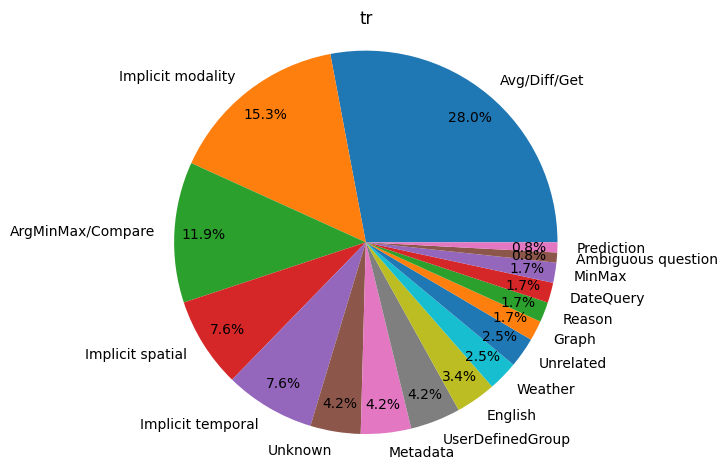

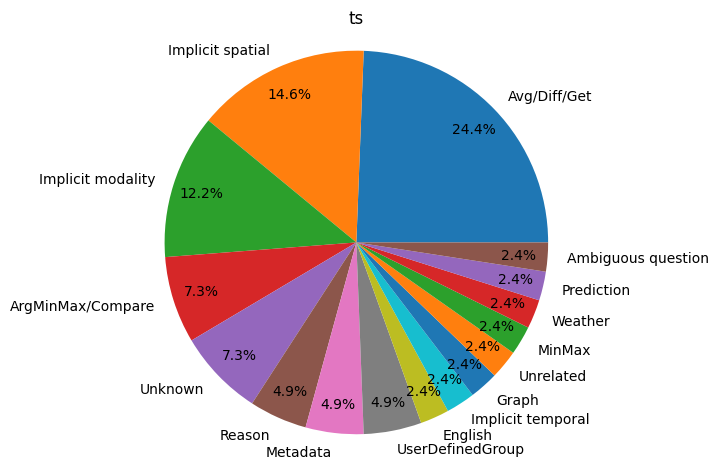

In [3]:
import matplotlib.pyplot as plt

# pie chart
# sort by number of styles

for repr, hist in histogram.items():
    hist = dict(sorted(hist.items(), key=lambda x: x[1], reverse=True))
    labels = hist.keys()
    sizes = hist.values()
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, 
    autopct='%1.1f%%', startangle=0, 
        pctdistance=0.85, labeldistance=1.1)
    ax1.axis('equal')
    plt.title(f"{repr}")
    plt.tight_layout()
    plt.show()
    plt.close()

In [ ]:
histogram_cat = defaultdict(lambda: 0)
for key, value in histogram.items():
    for style, count in value.items():
        histogram_cat[style] += count

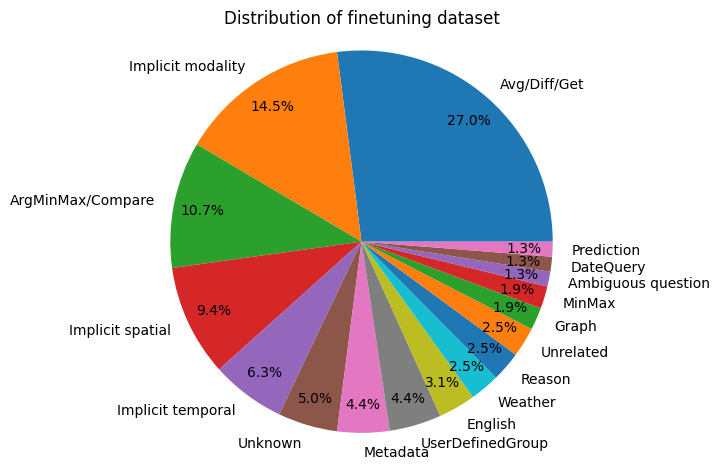

In [10]:
import matplotlib.pyplot as plt

# pie chart
# sort by number of styles

histogram_cat = dict(sorted(histogram_cat.items(), key=lambda x: x[1], reverse=True))
labels, sizes = zip(*histogram_cat.items())
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, 
autopct='%1.1f%%', startangle=0, 
    pctdistance=0.85, labeldistance=1.1)
ax1.axis('equal')
plt.title(f"Distribution of finetuning dataset")
plt.tight_layout()
plt.show()
plt.close()


In [11]:
print(list(histogram_cat.keys()))

['Avg/Diff/Get', 'Implicit modality', 'ArgMinMax/Compare', 'Implicit spatial', 'Implicit temporal', 'Unknown', 'Metadata', 'UserDefinedGroup', 'English', 'Weather', 'Reason', 'Unrelated', 'Graph', 'MinMax', 'Ambiguous question', 'DateQuery', 'Prediction']


In [ ]:
#['Avg/Diff/Get', 'Implicit modality', 'ArgMinMax/Compare', 'Implicit spatial', 'Implicit temporal', 'Unknown', 'Metadata', 'UserDefinedGroup', 'English', 'Weather', 'Reason', 'Unrelated', 'Graph', 'MinMax', 'Ambiguous question', 'DateQuery', 'Prediction'

key_map = {
    "Implicit": ["Implicit modality", "Implicit spatial", "Implicit temporal", "Weather"],
    "Get": ["Avg/Diff/Get"],
    "Compare": ["ArgMinMax/Compare", "MinMax"],
    "CornerCase": ["Unknown", "Unrelated", "Prediction"],
    "Metadata": ["Metadata", "UserDefinedGroup", "DateQuery"],
    "Reason": ["Reason"],
    "Graph": ["Graph"],
}

In [ ]:
import matplotlib.pyplot as plt

# pie chart
# sort by number of styles

histogram_cat = dict(sorted(histogram_cat.items(), key=lambda x: x[1], reverse=True))
labels, sizes = zip(*histogram_cat.items())
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, 
autopct='%1.1f%%', startangle=0, 
    pctdistance=0.85, labeldistance=1.1)
ax1.axis('equal')
plt.title(f"Distribution of finetuning dataset")
plt.tight_layout()
plt.show()
plt.close()
